<a href="https://colab.research.google.com/github/ZachGermain/DSPS_zgermain/blob/master/HW9_zgermain/higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [0]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
import pprint

In [3]:
pip install kaggle

In [4]:
cd /content/gdrive/My\ Drive/.kaggle

/content/gdrive/My Drive/.kaggle


In [5]:
ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [8]:
print(envs)

{'username': 'zachariahgermain', 'key': '8b5eb7b6e5b364b6fe3679df4ba5b93a'}


In [9]:
#check that it worked by listing the kaggle datasets
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16          10702  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02           6220  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          11802  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data                           4MB  2019-08-21 14:51:34           5109  
shuyangli94/food-com-recipes-and-user-interactions       Food.com Recipes and Interactio

In [10]:
cd /content/gdrive/My\ Drive/

/content/gdrive/My Drive


In [11]:
cd dsps

/content/gdrive/My Drive/dsps


In [12]:
!mkdir HiggsBoson

mkdir: cannot create directory ‘HiggsBoson’: File exists


In [13]:
cd HiggsBoson

/content/gdrive/My Drive/dsps/HiggsBoson


In [14]:
!kaggle competitions download -c higgs-boson

random_submission.zip: Skipping, found more recently modified local copy (use --force to force download)
training.zip: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
HiggsBosonCompetition_AMSMetric_rev1.py: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.zip      training.zip
random_submission.zip                    training.csv


In [16]:
!unzip training.zip

Archive:  training.zip
replace training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [17]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.zip      training.zip
random_submission.zip                    training.csv


In [0]:
higgsdata = pd.read_csv("training.csv")

In [19]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [20]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [0]:
labels = higgsdata["Label"]
weights = higgsdata["Weight"]
higgsdata = higgsdata.drop(["Label", "Weight"], axis = 1)

In [22]:
labels

0         s
1         b
2         b
3         b
4         b
         ..
249995    b
249996    b
249997    s
249998    b
249999    b
Name: Label, Length: 250000, dtype: object

In [23]:
weights

0         0.002653
1         2.233584
2         2.347389
3         5.446378
4         6.245333
            ...   
249995    4.505083
249996    2.497259
249997    0.018636
249998    1.681611
249999    1.877474
Name: Weight, Length: 250000, dtype: float64

In [0]:
# leave
from sklearn.model_selection import train_test_split 

In [0]:
#Splitting
df_train, df_test, lblTrain, lblTest, wtTrain, wtTest = train_test_split(higgsdata, labels, weights, test_size=0.4)

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [26]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

pp = pprint.PrettyPrinter();

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
pp.pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [27]:
gbt = GradientBoostingClassifier(random_state=0)
print('Parameters currently in use:\n')
pp.pprint(gbt.get_params())

Parameters currently in use:

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [28]:
rf.fit(df_train.values,lblTrain)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
gbt.fit(df_train.values,lblTrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [30]:
( rf.score(df_train.values,lblTrain), rf.score(df_test.values,lblTest) )

(0.98802, 0.82286)

It seems that the random forest method is overfitting as their is a large discrepancy between the score for the training and test data sets.

In [31]:
( gbt.score(df_train.values,lblTrain), gbt.score(df_test.values,lblTest) )

(0.83382, 0.8314)

The gradient boosted tree method does not seem to be overfitting the data.

- Produce a confusion matrix for each model and compare them


 



In [0]:
# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = pl.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    pl.xlabel("True")
    pl.ylabel("Predicted")
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = pl.colorbar(im, cax=cax)

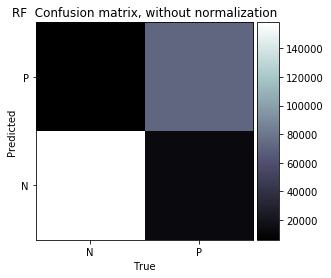

In [33]:
plot_confusion_matrix(rf.predict(higgsdata.values), labels, title = "RF ")

The confusion matrix plots the true negatives (lower left), true positives (upper right), false negatives (lower left) and false positives (upper left). We see that false negatives and positives are rare compared to true negatives and positives which shows that this model is a good predictor. 

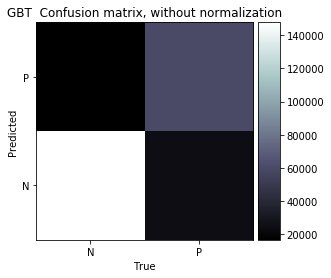

In [34]:
plot_confusion_matrix(gbt.predict(higgsdata.values), labels, title = "GBT ")

The confusion matrix plots the true negatives (lower left), true positives (upper right), false negatives (lower left) and false positives (upper left). We see that false negatives and positives are rare compared to true negatives and positives which shows that this model is a good predictor. But, the true positives are lower so this model might not be as good as the random forst model.


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [0]:
#Made training and test sets earlier with the labels

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rfR.fit(df_train.values, wtTrain)

gbtR = GradientBoostingRegressor(n_estimators = 100, max_depth = 3,
                                random_state = 0)
gbtR.fit(df_train.values, wtTrain);

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [0]:
wtPredRfR = rfR.predict(df_test.values)
wtPredGbtR = gbtR.predict(df_test.values)

In [0]:
def L1Calc (predictVals, trueVals):
  diffAbs = np.abs(predictVals - trueVals)
  return np.sum(diffAbs)

def L2Calc (predictVals, trueVals):
  diffSq = np.power(predictVals - trueVals, 2)
  return np.sum(diffSq)

In [39]:
print( "L1 RF: {0:.0f}".format(L1Calc(wtPredRfR, wtTest)) )
print( "L2 RF: {0:.0f}".format(L2Calc(wtPredRfR, wtTest)) )

print( "L1 GBT: {0:.0f}".format(L1Calc(wtPredGbtR, wtTest)) )
print( "L2 GBT: {0:.0f}".format(L2Calc(wtPredGbtR, wtTest)) )

L1 RF: 100733
L2 RF: 183412
L1 GBT: 84479
L2 GBT: 136418


The L1 is the mean absolute error while L2 is the mean squared error. For both, the random forest scores greater than the gradient boosted ensemble which means it has a greater error. This leads me to conclude that the gradient boosting ensemble method is better for this regressor. 

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [40]:
rfFeatureImportant = rf.feature_importances_
features_index = np.argsort(rfFeatureImportant)
best_features_index = features_index[0:4]

df_bestFeatures = higgsdata.iloc[:, best_features_index]
df_bestFeaturesTrain = df_train.iloc[:, best_features_index]
df_bestFeaturesTest = df_test.iloc[:, best_features_index]
df_bestFeatures.head()

,PRI_jet_num,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_subleading_pt
0,2,1.24,-2.475,46.062
1,1,-999.00,-999.000,-999.000
2,1,-999.00,-999.000,-999.000
3,0,-999.00,-999.000,-999.000
4,0,-999.00,-999.000,-999.000


The most important features deal with the measured data about the collision jets produced. The number of jets produced by a collision, angle and location of the jet to the collision.

In [41]:
random_grid = { 'n_estimators': [10,100], 'max_depth': [3, 10, None], 
               'bootstrap': [True, False], 'max_features': ['auto', 'sqrt'],
               'random_state': [0]}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [3, 10, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 100],
 'random_state': [0]}


In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3, iid=False)

Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [43]:
random_search.fit(df_bestFeaturesTrain.values, lblTrain)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [44]:
rfParamsBest = random_search.best_params_
print("Tuned RF  Parameters: {}".format(rfParamsBest))
print("Best score is {}".format(random_search.best_score_))

Tuned RF  Parameters: {'random_state': 0, 'n_estimators': 100, 'max_features': 'auto', 'max_depth': 3, 'bootstrap': True}
Best score is 0.6771933333333333


In [0]:
df = pd.DataFrame(random_search.cv_results_)

In [46]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.140284,0.01404,0.361014,0.002465,0,100,auto,3,True,"{'random_state': 0, 'n_estimators': 100, 'max_...",0.67852,0.67816,0.6749,0.677193,0.001628,1


# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [47]:
rf = RandomForestClassifier( max_depth = rfParamsBest["max_depth"], 
                            n_estimators = rfParamsBest["n_estimators"], 
                            max_features = rfParamsBest["max_features"],
                            bootstrap = rfParamsBest["bootstrap"] )
rf.fit( df_bestFeaturesTrain, lblTrain.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

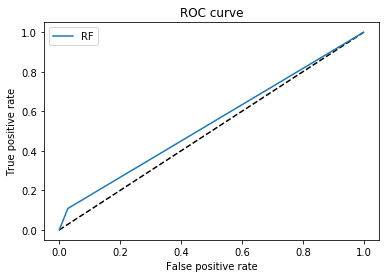

In [48]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(df_bestFeaturesTest.values)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(lblTest.values.flatten()=="s", rf.predict(df_bestFeaturesTest.values)=="s")

pl.figure(1)
pl.plot([0, 1], [0, 1], 'k--')
pl.plot(fpr_rf, tpr_rf, label='RF')
pl.xlabel('False positive rate')
pl.ylabel('True positive rate')
pl.title('ROC curve')
pl.legend(loc='best')
pl.show()